Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
2.Plot bar charts showing impact of employee salaries on retention
3.Plot bar charts showing corelation between department and employee retention
4.Now build logistic regression model using variables that were narrowed down in step 1
5.Measure the accuracy of the model

Attendance
Matilda Savage
Kasham Bature
Odunayo Abogunrin
Oluwabukunmi Falohun
Nkechiyenre Ariom
Oghenetega John
Maureen Muomah
Lydia Karioko
Odinaka Ojiba

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [11]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Question 1
Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [12]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [13]:
categorical = df.select_dtypes(include='object')
categorical.columns

Index(['Department', 'salary'], dtype='object')

In [14]:
correlation = numeric_features.corr()
print(correlation['left'].sort_values(ascending = False),'\n')

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64 



<AxesSubplot:title={'center':'correlation'}>

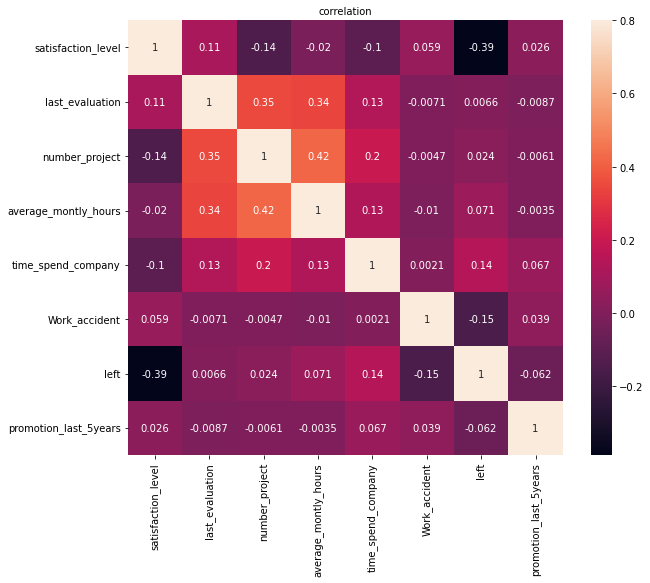

In [15]:
f,ax = plt.subplots(figsize =(10,8))
plt.title('correlation', y = 1, size = 10)
sns.heatmap(correlation,square = True, vmax = 0.8, annot = True)

In [16]:
df = df[['left','time_spend_company' ]]
df

,left,time_spend_company
0,1,3
1,1,6
2,1,4
3,1,5
4,1,3
...,...,...
14994,1,3
14995,1,3
14996,1,3
14997,1,4


# Question 2
Plot bar charts showing impact of employee salaries on retention

In [35]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


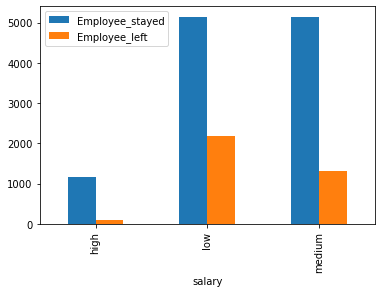

In [46]:
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.legend(['Employee_stayed', 'Employee_left'])

This visualization shows that salary has no impact on employee retention, because across all the three categories of the salary, more employee stayed back irrespective of their income

# Question 3
Plot bar charts showing corelation between department and employee retention

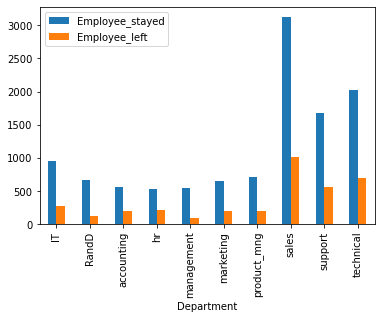

In [47]:
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.legend(['Employee_stayed', 'Employee_left'])

#This visualization shows that sales department has the highest employee retention.

# Question 4
Now build logistic regression model using variables that were narrowed down in step 1

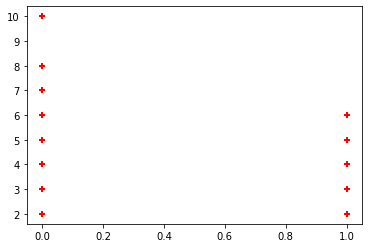

In [48]:
plt.scatter(df.left, df.time_spend_company,marker='+',color='red')

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_test, y_train, y_test = train_test_split(df[['left']],df['time_spend_company'],train_size=0.8)

In [51]:
X_test

,left
1242,1
12139,1
643,1
2921,0
5992,0
...,...
8212,0
2172,0
649,1
10475,0


In [52]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)

LogisticRegression()

In [54]:
X_test

,left
1242,1
12139,1
643,1
2921,0
5992,0
...,...
8212,0
2172,0
649,1
10475,0


In [55]:
y_predicted = model.predict(X_test)

In [56]:
model.predict_proba(X_test)

array([[0.01455263, 0.44243335, 0.25189948, ..., 0.00067168, 0.00063181,
        0.0006908 ],
       [0.01455263, 0.44243335, 0.25189948, ..., 0.00067168, 0.00063181,
        0.0006908 ],
       [0.01455263, 0.44243335, 0.25189948, ..., 0.00067168, 0.00063181,
        0.0006908 ],
       ...,
       [0.01455263, 0.44243335, 0.25189948, ..., 0.00067168, 0.00063181,
        0.0006908 ],
       [0.28024826, 0.42385418, 0.14719438, ..., 0.01664485, 0.01391991,
        0.01806514],
       [0.01455263, 0.44243335, 0.25189948, ..., 0.00067168, 0.00063181,
        0.0006908 ]])

In [57]:
model.score(X_test,y_predicted)

1.0

In [58]:
y_predicted

array([3, 3, 3, ..., 3, 3, 3], dtype=int64)

In [59]:
X_test

,left
1242,1
12139,1
643,1
2921,0
5992,0
...,...
8212,0
2172,0
649,1
10475,0


In [60]:
model.coef_

array([[-1.6783114 ],
       [ 1.3224932 ],
       [ 1.81686895],
       [ 2.67785588],
       [ 1.58875822],
       [-1.93047858],
       [-1.81288735],
       [-1.98429892]])

In [61]:
model.intercept_

array([ 1.53282417,  1.94653777,  0.88890234, -0.06178286, -0.3373315 ,
       -1.2907506 , -1.46953174, -1.20886758])

# Question 5

# Measure the accuracy of the model

In [62]:
model.score(X_train, y_train)

0.42828569047420617